In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
bd = pd.read_csv('datasus_suicidio_2014_2018.csv', encoding='latin1')
bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


In [96]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      58634 non-null  object 
 1   ano         58634 non-null  int64  
 2   CIRCOBITO   56606 non-null  object 
 3   DTOBITO     58634 non-null  object 
 4   DTNASC      58407 non-null  object 
 5   SEXO        58619 non-null  object 
 6   RACACOR     57298 non-null  object 
 7   ESTCIV      54305 non-null  object 
 8   ESC         45162 non-null  object 
 9   OCUP        58634 non-null  object 
 10  CODMUNRES   58634 non-null  object 
 11  LOCOCOR     58463 non-null  object 
 12  ASSISTMED   40872 non-null  object 
 13  CAUSABAS    58634 non-null  object 
 14  CAUSABAS_O  58544 non-null  object 
 15  idade       58407 non-null  float64
 16  mes         58634 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 7.6+ MB


In [176]:
bd.isnull().sum()

estado                 0
ano                    0
CIRCOBITO           2027
DTOBITO                0
DTNASC               215
SEXO                   0
RACACOR             1326
ESTCIV              4315
ESC                13458
OCUP                   0
CODMUNRES              0
LOCOCOR              169
ASSISTMED          17757
CAUSABAS               0
CAUSABAS_O            90
idade                215
mes                    0
categoria_idade        0
dtype: int64

In [98]:
jovens = bd[(bd['CIRCOBITO'] == 'Suicídio') & (bd['idade'] < 24)].shape[0]
adultos = bd[(bd['CIRCOBITO'] == 'Suicídio') & (bd['idade'] > 24)].shape[0]
print(f'Numero de jovens : {jovens}')
print(f'Numero de adultos : {adultos}')

Numero de jovens : 8162
Numero de adultos : 46063


In [99]:
percentJovem = (jovens / (jovens+adultos)) * 100
print(f'Porcentagem de jovens: {percentJovem:.2f}%')
percentAdultos = (adultos / (jovens+adultos)) * 100
print(f'Porcentagem de adultos: {percentAdultos:.2f}%')

Porcentagem de jovens: 15.05%
Porcentagem de adultos: 84.95%


In [100]:
bd[(bd['idade'] > 20) & (bd['OCUP'] == 'ESTUDANTE')]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
70,AL,2014,Suicídio,11-03-14,07-05-87,Feminino,Parda,Solteiro,NaN,ESTUDANTE,Maceió,Domicílio,NaN,X709,X709,27.0,3
127,AL,2014,Suicídio,15-09-14,14-09-93,Masculino,Parda,Solteiro,NaN,ESTUDANTE,Maceió,Outros,NaN,X789,X789,21.0,9
163,AL,2014,Suicídio,21-12-14,04-02-92,Feminino,Parda,Solteiro,NaN,ESTUDANTE,Palmeira Dos Índios,Domicílio,NaN,X700,X700,22.0,12
168,AP,2014,Suicídio,19-01-14,12-07-93,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Santana,Domicílio,Não,X709,X709,21.0,1
235,AM,2014,NaN,17-02-14,14-09-93,Feminino,Indígena,Solteiro,4 a 7 anos,ESTUDANTE,Atalaia do Norte,Domicílio,Não,X709,X709,21.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58603,TO,2018,Suicídio,01-08-18,15-07-94,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Domicílio,Não,X740,X740,24.0,8
58611,TO,2018,Suicídio,01-11-18,29-11-97,Masculino,Branca,Solteiro,8 a 11 anos,ESTUDANTE,Aragominas,Domicílio,Não,X730,X730,21.0,11
58623,TO,2018,Suicídio,22-02-18,25-04-78,Masculino,Parda,Solteiro,NaN,ESTUDANTE,Bom Jesus do Tocantins,Domicílio,Não,X740,X740,40.0,2
58624,TO,2018,Suicídio,02-03-18,14-02-63,Feminino,Parda,Casado,NaN,ESTUDANTE,Aparecida do Rio Negro,Domicílio,Não,X700,X700,55.0,3


In [101]:
def classificarIdade(idade):
    if idade <= 24:
        return 'Jovem'
    elif 24 < idade <= 59:
        return 'Adulto'
    else:
        return 'Idoso'
    
bd['categoria_idade'] = bd['idade'].apply(classificarIdade)

In [102]:
bd

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1,Adulto
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1,Adulto
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1,Idoso
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2,Jovem
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4,Adulto
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5,Adulto
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5,Idoso
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7,Jovem


<Axes: xlabel='estado'>

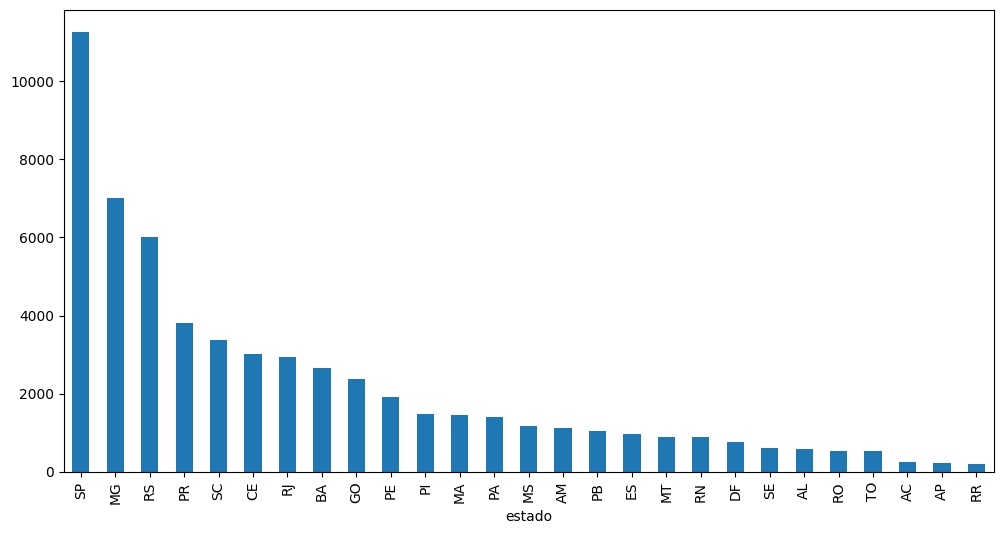

In [103]:
plt.figure(figsize=(12, 6))
bd['estado'].value_counts().plot.bar()

<Axes: xlabel='mes'>

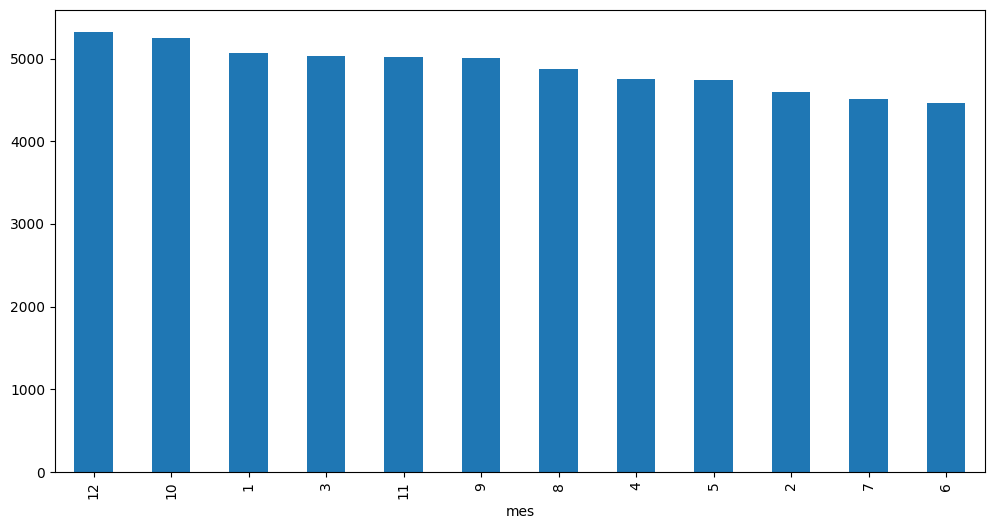

In [104]:
plt.figure(figsize=(12, 6))
bd['mes'].value_counts().plot.bar()

<Axes: xlabel='RACACOR'>

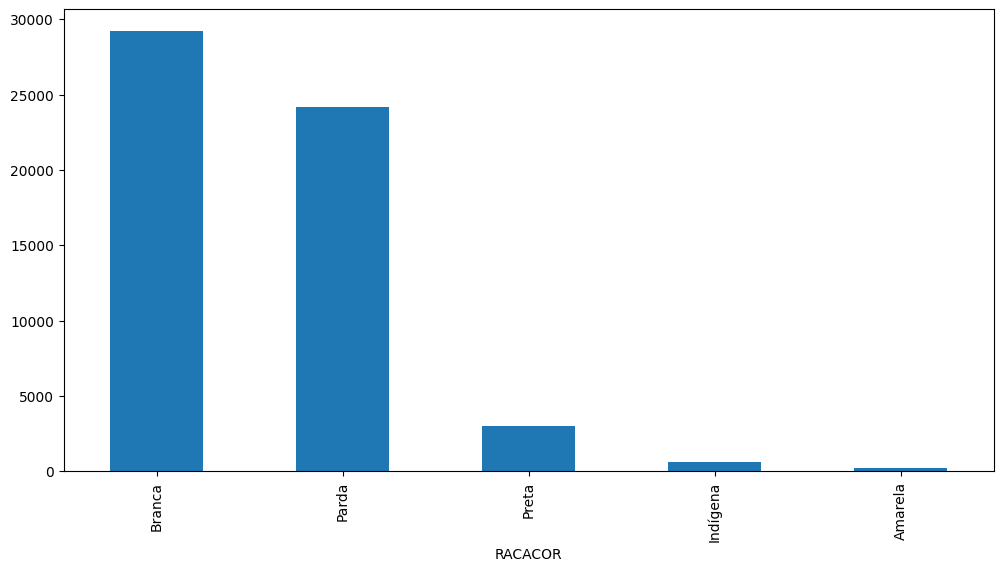

In [105]:
plt.figure(figsize=(12, 6))
bd['RACACOR'].value_counts().plot.bar()

<Axes: ylabel='count'>

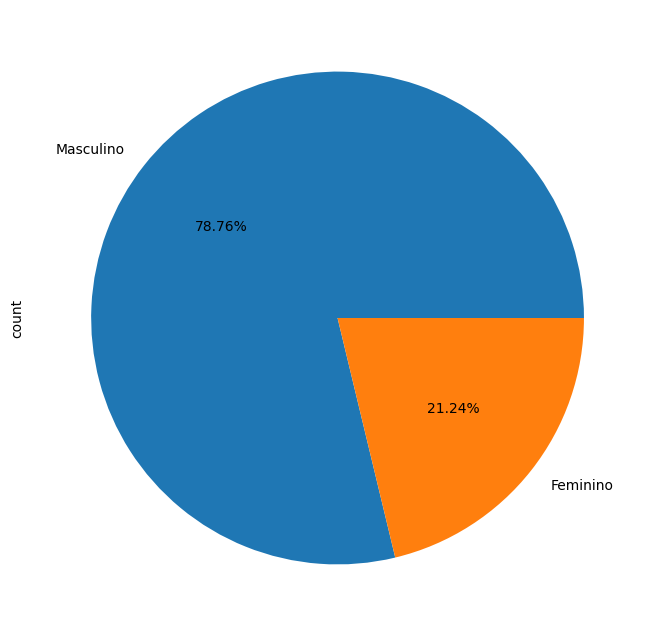

In [106]:
bd['SEXO'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

<Axes: ylabel='count'>

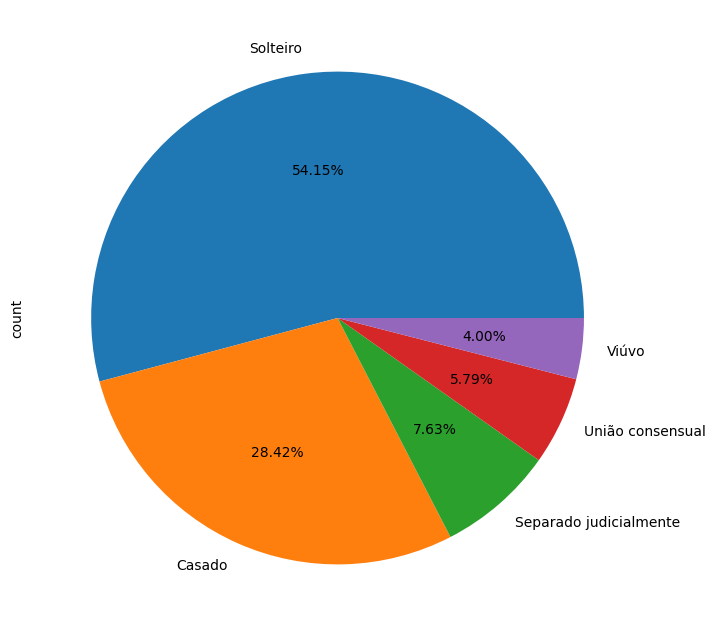

In [107]:
bd['ESTCIV'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

<Axes: ylabel='count'>

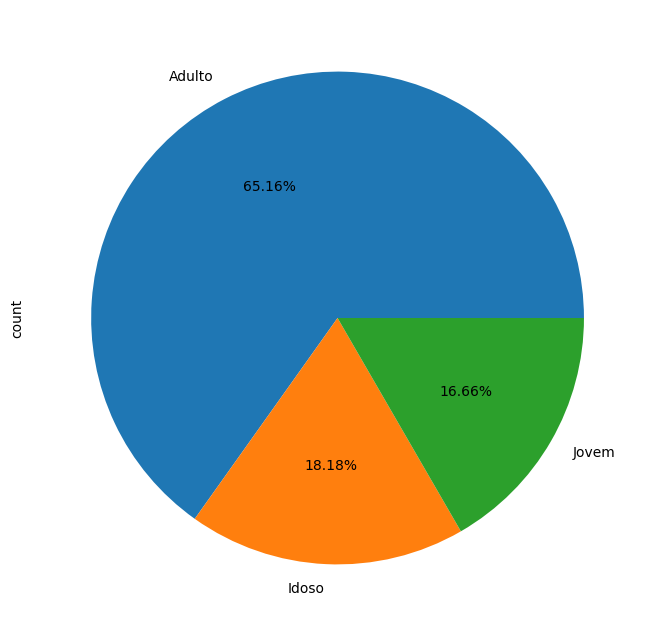

In [175]:
bd['categoria_idade'].value_counts().plot.pie(autopct='%0.2f%%', figsize=(8, 8))

<Axes: xlabel='CIRCOBITO'>

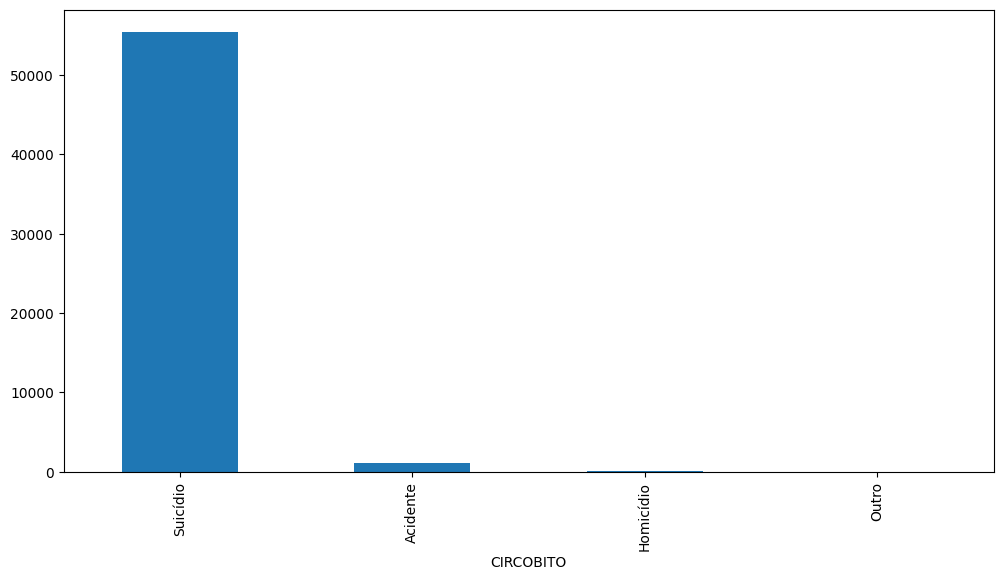

In [180]:
plt.figure(figsize=(12, 6))
bd['CIRCOBITO'].value_counts().plot.bar()

In [131]:
bd[(bd['SEXO'].isnull()) & (bd['RACACOR'] == 'Indígena')]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
10613,TO,2014,Suicídio,01-02-14,20-03-90,NaN,Indígena,Solteiro,Nenhuma,0,Lagoa da Confusão,Domicílio,Não,X700,X700,24.0,2,Jovem


In [160]:
pren = bd[(bd['RACACOR'] == 'Indígena') & (bd['categoria_idade'] == 'Jovem') & (bd['OCUP'] == '0')  & (bd['LOCOCOR'] == 'Domicílio') & (bd['CAUSABAS'] == 'X700') & (bd['CAUSABAS_O'] == 'X700') & (bd['ASSISTMED'] == 'Não')]

In [161]:
pren['SEXO'] = pren['SEXO'].map({'Masculino': 1, 'Feminino': 0})

C:\Users\Vitor\AppData\Local\Temp\ipykernel_15860\1835943331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pren['SEXO'] = pren['SEXO'].map({'Masculino': 1, 'Feminino': 0})


In [162]:
pren['SEXO'].mode()

0    1.0
Name: SEXO, dtype: float64

In [163]:
pren['SEXO'].median()

1.0

In [ ]:
# SEI NAO EM 
pren['SEXO'].mean()

0.6551724137931034

In [169]:
bd.loc[(bd['SEXO'].isnull()) & (bd['RACACOR'] == 'Indígena'), 'SEXO'] = 'Masculino'

In [171]:
bd[(bd['SEXO'].isnull())]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
11076,AM,2015,Suicídio,26-06-15,NaN,NaN,NaN,NaN,NaN,0,Rio Preto da Eva,Outros,Não,X700,X700,NaN,6,Idoso
15216,PA,2015,Suicídio,05-07-15,NaN,NaN,Parda,NaN,NaN,0,Novo Repartimento,Outros,Não,X709,X709,NaN,7,Idoso
22773,BA,2016,Suicídio,03-12-16,NaN,NaN,NaN,NaN,NaN,0,Porto Seguro,NaN,NaN,X709,X709,NaN,12,Idoso
30980,SP,2016,Suicídio,10-01-16,23-08-77,NaN,NaN,NaN,NaN,0,São José Dos Campos,Hospital,NaN,X689,K920,39.0,1,Adulto
36294,MT,2017,Suicídio,27-01-17,NaN,NaN,Parda,NaN,NaN,0,Lucas do Rio Verde,Domicílio,Não,X700,X700,NaN,1,Idoso
38407,PA,2017,Suicídio,10-09-17,NaN,NaN,NaN,NaN,NaN,0,Marabá,Outros,Não,X700,X700,NaN,9,Idoso
38459,PA,2017,Suicídio,17-02-17,NaN,NaN,NaN,NaN,NaN,0,Marabá,NaN,NaN,X709,X709,NaN,2,Idoso
39231,PR,2017,Suicídio,05-11-17,NaN,NaN,NaN,NaN,NaN,0,410000,Outros,Não,X701,X701,NaN,11,Idoso
39987,PI,2017,Suicídio,11-07-17,NaN,NaN,NaN,NaN,NaN,0,Monsenhor Gil,Hospital,Sim,X760,X760,NaN,7,Idoso
47856,ES,2018,Suicídio,03-05-18,17-11-76,NaN,Parda,NaN,NaN,0,Vila Velha,Hospital,Sim,X709,R99,42.0,5,Adulto


In [173]:
bd.dropna(subset=['SEXO'], inplace=True)

In [174]:
bd[(bd['SEXO'].isnull())]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade


In [178]:
bd[bd['CIRCOBITO'].isnull()]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
57,AL,2014,NaN,11-02-14,24-09-39,Feminino,Parda,Viúvo,Nenhuma,APOSENTADO/PENSIONISTA,Arapiraca,Domicílio,Não,X699,X699,75.0,2,Idoso
66,AL,2014,NaN,28-02-14,28-04-83,Feminino,Parda,Casado,8 a 11 anos,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,Coité do Nóia,Domicílio,NaN,X700,X700,31.0,2,Adulto
103,AL,2014,NaN,09-06-14,13-06-69,Masculino,Parda,Solteiro,NaN,TRABALHADOR VOLANTE DA AGRICULTURA,Estrela de Alagoas,Domicílio,Não,X709,X709,45.0,6,Adulto
212,AM,2014,NaN,16-01-14,13-12-93,Masculino,Indígena,Solteiro,8 a 11 anos,0,Tabatinga,Domicílio,NaN,X700,X700,21.0,1,Jovem
218,AM,2014,NaN,25-01-14,20-12-42,Masculino,Parda,Viúvo,4 a 7 anos,0,Codajás,Domicílio,NaN,X700,X700,72.0,1,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58205,SP,2018,NaN,21-10-18,14-05-87,Masculino,Branca,Solteiro,12 e mais,"OPERADOR DE MAQUINAS FIXAS, EM GERAL",Moji-mirim,Hospital,NaN,X649,X649,31.0,10,Adulto
58297,SP,2018,NaN,29-12-18,05-01-86,Masculino,Branca,Solteiro,4 a 7 anos,AJUDANTE DE MOTORISTA,Bebedouro,Domicílio,Não,X700,X700,32.0,12,Adulto
58361,SP,2018,NaN,28-12-18,20-08-79,Masculino,Branca,Solteiro,12 e mais,COMERCIANTE ATACADISTA,Itanhaém,Domicílio,NaN,X780,X780,39.0,12,Adulto
58466,SE,2018,NaN,24-12-18,07-09-49,Masculino,Preta,Casado,Nenhuma,0,Itaporanga D´ajuda,Outro estabelecimento de saúde,Sim,X689,X689,69.0,12,Idoso


In [183]:
bd[bd['CIRCOBITO'] == 'Acidente']

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade
26,AC,2014,Acidente,31-08-14,16-08-76,Masculino,Parda,União consensual,Nenhuma,DONA DE CASA,Feijó,Domicílio,Não,X700,X700,38.0,8,Adulto
40,AC,2014,Acidente,20-11-14,03-08-62,Feminino,Parda,Casado,Nenhuma,DONA DE CASA,Feijó,Domicílio,NaN,X700,X700,52.0,11,Adulto
83,AL,2014,Acidente,15-04-14,04-11-73,Masculino,Parda,Solteiro,NaN,0,Maceió,Domicílio,NaN,X709,X709,41.0,4,Adulto
222,AM,2014,Acidente,31-01-14,08-09-73,Feminino,Parda,Solteiro,8 a 11 anos,AGENTE DE SAUDE PUBLICA,Manaus,Domicílio,NaN,X700,X700,41.0,1,Adulto
234,AM,2014,Acidente,16-02-14,15-07-54,Masculino,Indígena,Casado,NaN,CASEIRO (AGRICULTURA),São Gabriel da Cachoeira,Outros,NaN,X731,X731,60.0,2,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57889,SP,2018,Acidente,02-09-18,24-06-91,Masculino,Parda,Solteiro,4 a 7 anos,SERVENTE DE OBRAS,Hortolândia,Via pública,Sim,X824,X824,27.0,9,Adulto
58011,SP,2018,Acidente,31-12-18,02-04-62,Masculino,Branca,Solteiro,1 a 3 anos,TRABALHADOR VOLANTE DA AGRICULTURA,Estiva Gerbi,Domicílio,NaN,X650,X650,56.0,12,Adulto
58370,SP,2018,Acidente,26-12-18,NaN,Masculino,Parda,NaN,NaN,IGNORADA,350000,Outro estabelecimento de saúde,Sim,X708,X708,NaN,12,Idoso
58591,TO,2018,Acidente,06-09-18,11-03-44,Masculino,Parda,Casado,NaN,TRABALHADOR AGROPECUARIO EM GERAL,Ananás,Domicílio,NaN,X700,X700,74.0,9,Idoso


In [187]:
bd['RACACOR'].fillna('Não informado', inplace=True)

In [188]:
bd[bd['RACACOR'].isnull()]

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes,categoria_idade


In [189]:
bd.isnull().sum()

estado                 0
ano                    0
CIRCOBITO           2027
DTOBITO                0
DTNASC               215
SEXO                   0
RACACOR                0
ESTCIV              4315
ESC                13458
OCUP                   0
CODMUNRES              0
LOCOCOR              169
ASSISTMED          17757
CAUSABAS               0
CAUSABAS_O            90
idade                215
mes                    0
categoria_idade        0
dtype: int64

    ESTCIV              4315
    ESC                13458
    relacionar com a idade